# Chapter 3 Applied Labs


## Q14 (dealing with collinearity)

In [1]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd


sns.set(style="whitegrid")

### (a) Create the below variables.

In [2]:
x1 = np.random.uniform(size=100)
x2 = 0.5*x1 + np.random.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + np.random.normal(size=100)
# regression coefficients: B0 = 2, B1=2, B2=0.3


### (b) Create a scatterplot showing the relationship between `x1` and `x2`

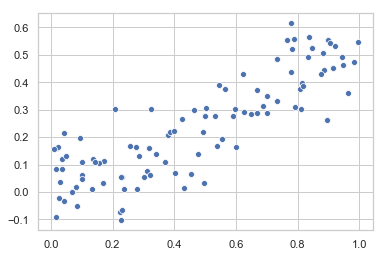

In [3]:
sns.scatterplot(x1,x2)

### (c) Fit a least squares regression predicting `y` given `x1` and `x2`

In [4]:
test_data = sm.add_constant(pd.DataFrame(zip(x1,x2, y), columns=["x1","x2","y"]))
model = smf.ols('y ~ x1 + x2', data=test_data) # == lstat+age+lstat:age
results = model.fit()
results.summary()

/home/will/.local/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     15.94
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.03e-06
Time:                        15:38:17   Log-Likelihood:                -150.42
No. Observations:                 100   AIC:                             306.8
Df Residuals:                      97   BIC:                             314.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1200      0.201     10.563      0.000       1.722       2.518
x1             1.9177      0.678      2.831      0.006       0.573       3.262
x2             0.2310      1.131      0.204      0.839      -2.013       2.475
==============================================================================
Omnibus:                        0.099   Durbin-Watson:                   1.707
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.212
Skew:                           0.068   Prob(JB):                        0.899
Kurtosis:                       2.820   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

B0=2.0, B1=2.5, B2=-0.9. B0 and B1 are within the errors. B2 is not (it's not even got the right sign), but it's also insignificant

### (d) Fit a least squares regression predicting `y` given only  `x1`

In [5]:
test_data = sm.add_constant(pd.DataFrame(zip(x1,x2, y), columns=["x1","x2","y"]))
model = smf.ols('y ~ x1', data=test_data) # == lstat+age+lstat:age
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     32.15
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.44e-07
Time:                        15:38:17   Log-Likelihood:                -150.44
No. Observations:                 100   AIC:                             304.9
Df Residuals:                      98   BIC:                             310.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1197      0.200     10.614      0.000       1.723       2.516
x1             2.0349      0.359      5.670      0.000       1.323       2.747
==============================================================================
Omnibus:                        0.133   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.936   Jarque-Bera (JB):                0.262
Skew:                           0.075   Prob(JB):                        0.877
Kurtosis:                       2.800   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 is roughly the same as in the x1~x2 case, and the p-value for B1 is ~0.0

### (e) Fit a least squares regression predicting `y` given only  `x2`

In [6]:
test_data = sm.add_constant(pd.DataFrame(zip(x1,x2, y), columns=["x1","x2","y"]))
model = smf.ols('y ~ x2', data=test_data) # == lstat+age+lstat:age
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     22.27
Date:                Fri, 17 May 2019   Prob (F-statistic):           7.87e-06
Time:                        15:38:17   Log-Likelihood:                -154.38
No. Observations:                 100   AIC:                             312.8
Df Residuals:                      98   BIC:                             318.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3757      0.186     12.805      0.000       2.008       2.744
x2             2.9408      0.623      4.719      0.000       1.704       4.177
==============================================================================
Omnibus:                        0.949   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.622   Jarque-Bera (JB):                0.484
Skew:                          -0.091   Prob(JB):                        0.785
Kurtosis:                       3.288   Cond. No.                         5.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R2 value has gone down, but note that the p-value for B1 (formerly B2) is now ~0.0 - it was the collinearity that led to it being insignificant previously

### (f) suppose we add another, mislabeled, point. Re-fit the models and comment on the effect it has. In each model, is the observation an outlier? A high-leverage point? Both?

In [7]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)
test_data = sm.add_constant(pd.DataFrame(zip(x1,x2, y), columns=["x1","x2","y"]))


In [8]:
model1_2 = smf.ols('y ~ x1 + x2', data=test_data) # == lstat+age+lstat:age
results = model1_2.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     15.49
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.43e-06
Time:                        15:38:17   Log-Likelihood:                -154.56
No. Observations:                 101   AIC:                             315.1
Df Residuals:                      98   BIC:                             323.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1829      0.204     10.682      0.000       1.777       2.588
x1             0.9689      0.575      1.684      0.095      -0.173       2.111
x2             1.9359      0.925      2.094      0.039       0.101       3.771
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.014
Skew:                           0.018   Prob(JB):                        0.993
Kurtosis:                       2.956   Cond. No.                         10.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model1 = smf.ols('y ~ x1', data=test_data) # == lstat+age+lstat:age
results = model1.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     25.72
Date:                Fri, 17 May 2019   Prob (F-statistic):           1.84e-06
Time:                        15:38:17   Log-Likelihood:                -156.77
No. Observations:                 101   AIC:                             317.5
Df Residuals:                      99   BIC:                             322.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2202      0.207     10.725      0.000       1.809       2.631
x1             1.8957      0.374      5.071      0.000       1.154       2.637
==============================================================================
Omnibus:                        2.291   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.709
Skew:                           0.282   Prob(JB):                        0.426
Kurtosis:                       3.297   Cond. No.                         4.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
model2 = smf.ols('y ~ x2', data=test_data) # == lstat+age+lstat:age
results = model2.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     27.63
Date:                Fri, 17 May 2019   Prob (F-statistic):           8.45e-07
Time:                        15:38:17   Log-Likelihood:                -156.00
No. Observations:                 101   AIC:                             316.0
Df Residuals:                      99   BIC:                             321.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3420      0.183     12.807      0.000       1.979       2.705
x2             3.1338      0.596      5.257      0.000       1.951       4.317
==============================================================================
Omnibus:                        0.868   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.648   Jarque-Bera (JB):                0.436
Skew:                          -0.105   Prob(JB):                        0.804
Kurtosis:                       3.244   Cond. No.                         5.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The effect is greatest on the y ~ x1 + x2 model, in which the p-values of the model change highly (B2 now significant) and the coefficient of B2 goes from -0.8 to +2.7

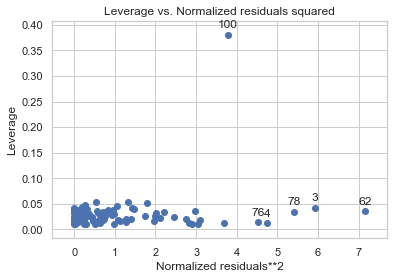

In [11]:
fig=sm.graphics.plot_leverage_resid2(model1_2.fit())  #, ax=ax)

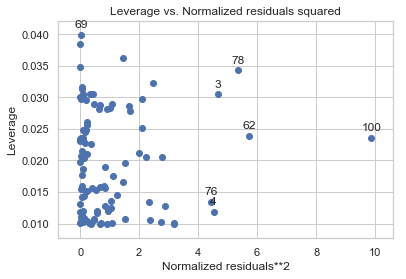

In [12]:
fig=sm.graphics.plot_leverage_resid2(model1.fit())  #, ax=ax)

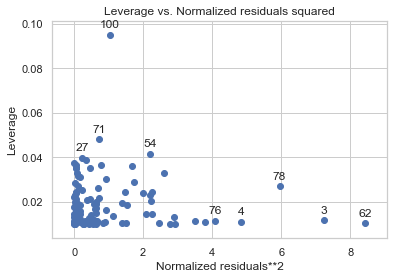

In [13]:
fig=sm.graphics.plot_leverage_resid2(model2.fit())  #, ax=ax)